In [23]:
#This file is for training the model.add()
#Import all modules
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [24]:
#read cleaned dataset for training
covid_train=pd.read_csv("Train_cleaned.csv")
covid_test=pd.read_csv("Test_cleaned.csv")


In [25]:
#Removing labels for training
#Drop ID during training as it has no correlation with the final outcome

#Train set
labels=['Unnamed: 0','ID','Variant']
x_train=covid_train.drop(labels,axis=1)
y_train=covid_train['Variant']

#Test set
x_test=covid_test.drop(["Unnamed: 0",'ID'],axis=1)



In [26]:
#One hot encoding for target attribute 
def one_hot(label,depth=6):
    encoded=tf.one_hot(label,depth,axis=0)
    return encoded

In [27]:
#Train set
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)

#Convert to one hot
y_train=np.array(one_hot(y_train))




In [28]:
#Transpose of one hot matrix to get m rows X n features shape matrix
y_train=np.transpose(y_train)

In [29]:
#Call sequential api 
model=tf.keras.Sequential()

In [30]:
#Build model using sequential api
def model_build(layers=5):
   hidden_units=[35,55,45,35,6]
   
   final=tf.keras.initializers.GlorotNormal(seed=1) 
   initials=tf.keras.initializers.HeNormal(seed=1) #Initialize weights to get values with 0 means
   for i in range(layers):
       if i==0:
           model.add(tf.keras.layers.Dense(hidden_units[i],activation="relu",kernel_initializer=initials,use_bias=True,bias_initializer=initials,input_shape=(21,)))
           model.add(tf.keras.layers.Dropout(rate=0.5))
       elif i>0 and i<layers-1:
           model.add(tf.keras.layers.Dense(hidden_units[i],activation="relu",kernel_initializer=initials,use_bias=True,bias_initializer=initials))
           model.add(tf.keras.layers.Dropout(rate=0.5))
       elif i==layers-1:
           model.add(tf.keras.layers.Dense(hidden_units[i],activation="softmax",kernel_initializer=final,use_bias=True,bias_initializer=final))
           

In [31]:
def model_run(x,y,learning_rate=0.001,num_epochs=2000,batchSize=32,show_costs=1): #Define hyperparameters for training
    algo=tf.keras.optimizers.Adam(learning_rate)
    model.compile(optimizer=algo,loss=tf.keras.losses.CategoricalCrossentropy(),metrics=[tf.keras.metrics.CategoricalAccuracy()])
    learning=model.fit(x,y,epochs=num_epochs,batch_size=batchSize,verbose=show_costs)
    
    return learning

In [32]:
def plot(learning): #Plot learning curve (Loss vs Epochs)
    plt.plot(learning.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.title("Learning curve")
    plt.show()

In [33]:
model_build()

In [34]:
model.summary() #Outputs model archiecture

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 35)                770       
                                                                 
 dropout_4 (Dropout)         (None, 35)                0         
                                                                 
 dense_6 (Dense)             (None, 55)                1980      
                                                                 
 dropout_5 (Dropout)         (None, 55)                0         
                                                                 
 dense_7 (Dense)             (None, 45)                2520      
                                                                 
 dropout_6 (Dropout)         (None, 45)                0         
                                                                 
 dense_8 (Dense)             (None, 35)               

In [35]:
learning=model_run(x_train,y_train) #Outputs losses and accuracy after each epoch

Epoch 1/2000
13/13 [==============================] - 1s 2ms/step - loss: 3.9937 - categorical_accuracy: 0.1564
Epoch 2/2000
13/13 [==============================] - 0s 2ms/step - loss: 3.1286 - categorical_accuracy: 0.2051
Epoch 3/2000
13/13 [==============================] - 0s 3ms/step - loss: 2.2358 - categorical_accuracy: 0.2487
Epoch 4/2000
13/13 [==============================] - 0s 3ms/step - loss: 1.9286 - categorical_accuracy: 0.2615
Epoch 5/2000
13/13 [==============================] - 0s 3ms/step - loss: 1.8524 - categorical_accuracy: 0.3385
Epoch 6/2000
13/13 [==============================] - 0s 3ms/step - loss: 1.7219 - categorical_accuracy: 0.3744
Epoch 7/2000
13/13 [==============================] - 0s 3ms/step - loss: 1.5668 - categorical_accuracy: 0.3897
Epoch 8/2000
13/13 [==============================] - 0s 3ms/step - loss: 1.5938 - categorical_accuracy: 0.4026
Epoch 9/2000
13/13 [==============================] - 0s 2ms/step - loss: 1.4422 - categorical_accuracy:

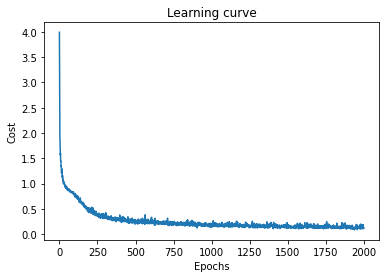

In [36]:
plot(learning) #Plot learning curve

In [37]:
model.weights #Outputs all weights that were obtained on training

[<tf.Variable 'dense_5/kernel:0' shape=(21, 35) dtype=float32, numpy=
 array([[-2.58068860e-01, -5.63668191e-01, -3.58282663e-02,
          9.35195386e-02, -2.34225970e-02, -1.75965391e-02,
          1.91089049e-01,  7.78527334e-02, -2.35713989e-01,
          1.55926170e-02, -4.31845970e-02, -1.80028692e-01,
         -7.02069163e-01,  8.18957835e-02, -1.29314095e-01,
          9.10506397e-02,  1.11468956e-01,  7.94396773e-02,
         -3.40297610e-01,  2.96927691e-01,  4.00337055e-02,
         -6.54551089e-02,  2.25617915e-01,  2.58301616e-01,
          7.24817067e-02, -8.02753419e-02,  2.17760161e-01,
          2.13755071e-01, -2.31292680e-01, -3.11424226e-01,
          1.51765496e-01, -6.38499022e-01,  3.09156179e-01,
         -2.96359062e-01, -1.58036724e-01],
        [ 1.75084025e-01, -4.81349081e-01,  3.15011531e-01,
         -2.58875847e-01, -1.20037362e-01,  3.66387606e-01,
         -1.00175574e-01, -1.84516847e-01, -2.69071143e-02,
          5.72723329e-01, -7.08120540e-02,  5.

In [39]:
model.save("./saved_model/covid_7") #Saves the model

INFO:tensorflow:Assets written to: ./saved_model/covid_7\assets
